In [1]:
import tensorflow as tf

In [2]:
import os
import sys
import collections

In [3]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)

In [5]:
from rl import action_learner

In [6]:
from rl import value_estimator

In [7]:
from progress_learner import EventProgressEstimator

In [8]:
import config
import project
# Need to add this import to load class
from project import Project

In [9]:
from importlib import reload

In [10]:
# To load this, I have to add pickle.load(f, encoding='latin-1')
# Otherwise it would give the bug
# https://stackoverflow.com/questions/21129020/how-to-fix-unicodedecodeerror-ascii-codec-cant-decode-byte
p = project.Project.load("../slidearound_hopstep_1.proj")

In [11]:
reload(config)
    
c = config.Config()

In [12]:
from rl import block_movement_env

In [48]:
reload(action_learner)


<module 'rl.action_learner' from 'D:\\git\\learn-to-perform\\rl\\action_learner.py'>

In [77]:
reload(value_estimator)

<module 'rl.value_estimator' from 'D:\\git\\learn-to-perform\\rl\\value_estimator.py'>

In [33]:
p.speed

0.083696821297196897

In [13]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## Test progress_estimator in a simulator

In [163]:
reload(block_movement_env)
tf.reset_default_graph()

sess =  tf.Session()

with tf.variable_scope("model") as scope:
    print('-------- Load progress model ---------')
    progress_estimator = EventProgressEstimator(is_training=False, name = p.name, config = c)  

saver = tf.train.Saver()
saver.restore(sess, '../progress.mod')

env = block_movement_env.BlockMovementEnv(c, p.speed, name = 'SlideAround', 
                       progress_estimator = progress_estimator, session = sess)

-------- Load progress model ---------
self.inputs.shape = (?, 20, 100)  after linear layer
output.shape = (10, 100) after LSTM
self.output.shape = (10,) after linear
self._targets.shape = (?,) 
INFO:tensorflow:Restoring parameters from ../progress.mod


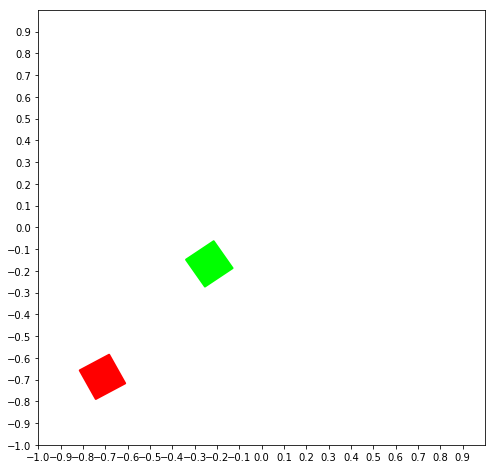

In [164]:
env.default()
env.render()

Progress = 0.10 ; reward = 0.10


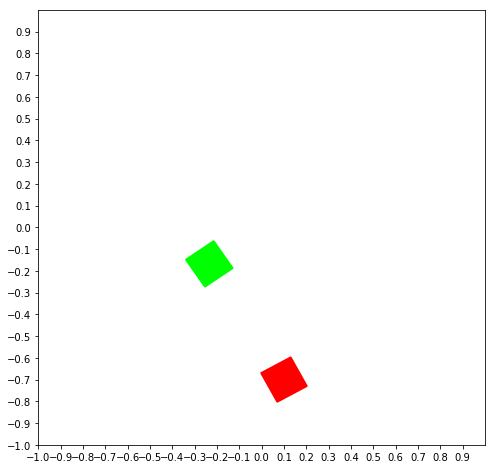

In [165]:
env.step((0, [0.1, -0.7, 0.5]))
env.render()

Progress = 0.34 ; reward = 0.24


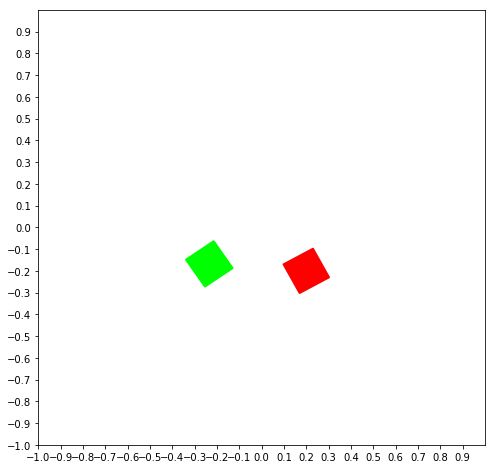

In [166]:
env.step((0, [0.2, -0.2, 0.5]))
env.render()

Progress = 0.70 ; reward = 0.36


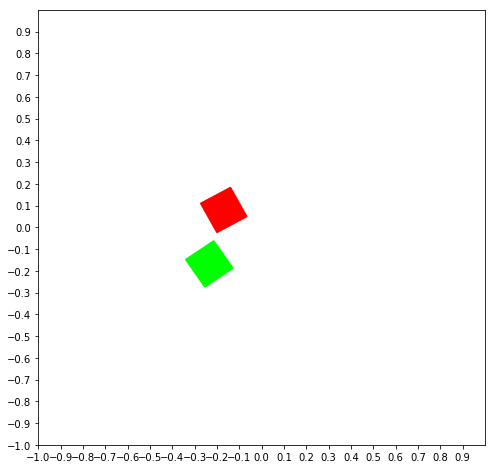

In [167]:
env.step((0, [-0.17, 0.08, 0.5]))
env.render()

Progress = 0.76 ; reward = 0.05


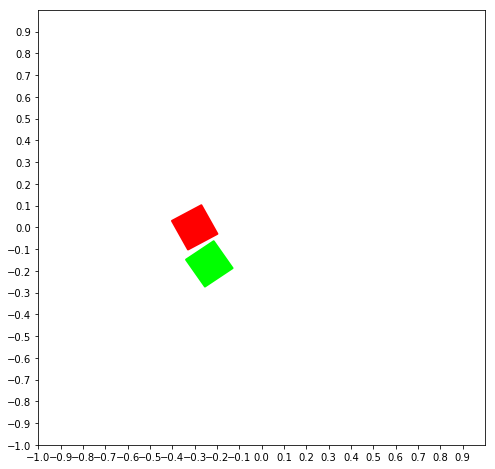

In [168]:
env.step((0, [-0.3, 0, 0.5]))
env.render()

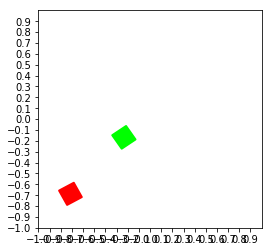

Progress = 0.10 ; reward = 0.10
Progress = 0.10
Progress = 0.10


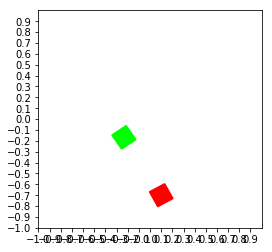

Progress = 0.34 ; reward = 0.24
Progress = 0.34
Progress = 0.34


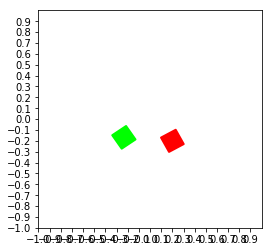

Progress = 0.70 ; reward = 0.36
Progress = 0.70
Progress = 0.70


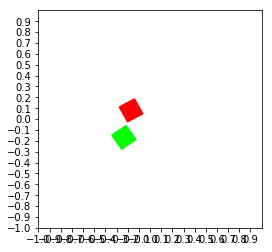

Progress = 0.76 ; reward = 0.05
Progress = 0.76
Progress = 0.76


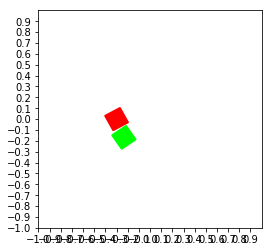

In [169]:
env.replay()

## Run reinforce algorithm

In [202]:
reload(config)
    
c = config.Config()
reload(block_movement_env)
reload(value_estimator)
reload(action_learner)
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

sess =  tf.Session()

policy_est = value_estimator.PolicyEstimator(c)
value_est = value_estimator.ValueEstimator(c)

sess.run(tf.global_variables_initializer())

with tf.variable_scope("model") as scope:
    print('-------- Load progress model ---------')
    progress_estimator = EventProgressEstimator(is_training=False, name = p.name, config = c)  

# Print out all variables that would be restored
for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
    print (variable.name)

saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'))
saver.restore(sess, '../progress.mod')

action_ln = action_learner.ActionLearner(c, p, progress_estimator, 
                               policy_est, value_est, session = sess)

action_policy = action_learner.random_action
past_envs, stats = action_ln.reinforce(action_policy, breadth = 5, verbose = True)

-------- Load progress model ---------
self.inputs.shape = (?, 20, 100)  after linear layer
output.shape = (10, 100) after LSTM
self.output.shape = (10,) after linear
self._targets.shape = (?,) 
model/SlideAround/linear/weight:0
model/SlideAround/linear/bias:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0
model/SlideAround/output_linear/weight:0
model/SlideAround/output_linear/bias:0
INFO:tensorflow:Restoring parameters from ../progress.mod
action_means = [ 0.  0.  0.] ; action_stds = [ 0.98628527  1.01099241  1.00034273]
(array([-0.84537469,  1.0830488 ,  0.33848459]), 0.044417485594749451, False)
Step 0 @ Episode 1/10 (0.04441748559474945)
action_means = [ 0.  0.  0.] ; action_stds = [ 0.9842447   1.00110602  0.97375953]
accumulate_reward = 0.04; predicted_reward = 0.49; advantage = -0.44
action_means = [ 0.00307462 -0.00307462 -0.00307462] ; action_stds = [ 0.89881414  0.87929392  0.9

(array([-0.19767649,  1.5236548 ,  1.77224515]), 0.082514896988868713, False)
Step 5 @ Episode 8/10 (0.814657992683351)
action_means = [ 0.00129476 -0.01902309 -0.01572478] ; action_stds = [ 1.14045501  1.07349992  1.18321311]
(array([ 2.48321456,  0.7863538 ,  0.83167624]), 0.068965792655944824, False)
Step 6 @ Episode 8/10 (0.8836237853392959)
action_means = [ -2.86440644e-03  -2.77939253e-05  -1.23787019e-02] ; action_stds = [ 1.26273108  1.1400404   1.22151744]
(array([ 0.92557286,  0.53599792,  0.46230963]), 0.058402739465236664, False)
Step 7 @ Episode 8/10 (0.9420265248045325)
action_means = [ 0.00192802 -0.00535882 -0.00901645] ; action_stds = [ 1.05087781  0.99390996  1.05266118]
(array([ 0.55563948, -0.98982383, -1.00796607]), -0.046188943, True)
Step 8 @ Episode 8/10 (0.8958375817164779)
accumulate_reward = -0.05; predicted_reward = 0.49; advantage = -0.54
accumulate_reward = 0.01; predicted_reward = 0.49; advantage = -0.48
accumulate_reward = 0.08; predicted_reward = 0.46; 

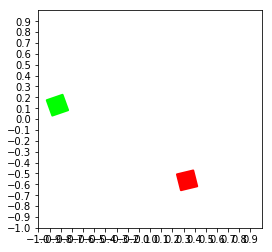

Progress = 0.02
Progress = 0.02


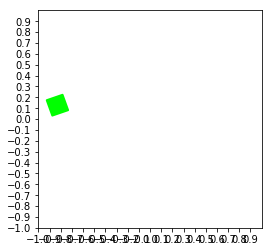

Progress = 0.06
Progress = 0.06


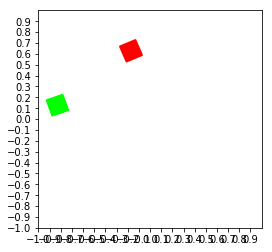

Progress = 0.29
Progress = 0.29


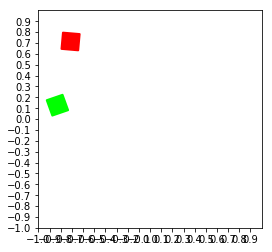

Progress = 0.55
Progress = 0.55


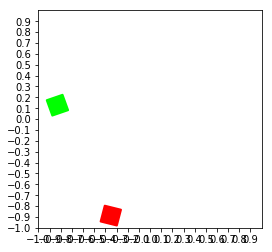

In [203]:
past_envs[4].env.replay()

In [52]:
import plotting

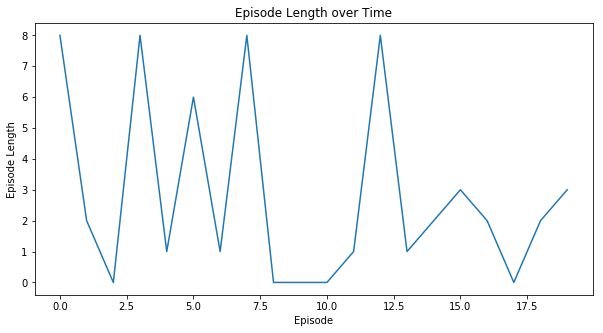

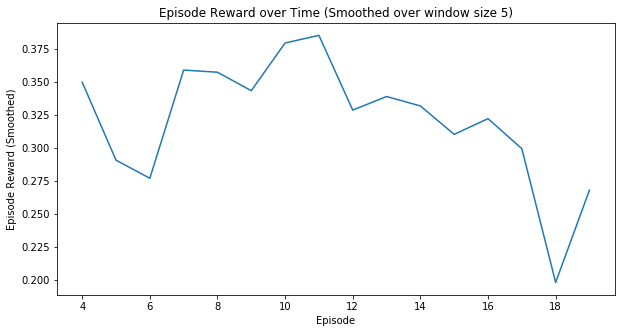

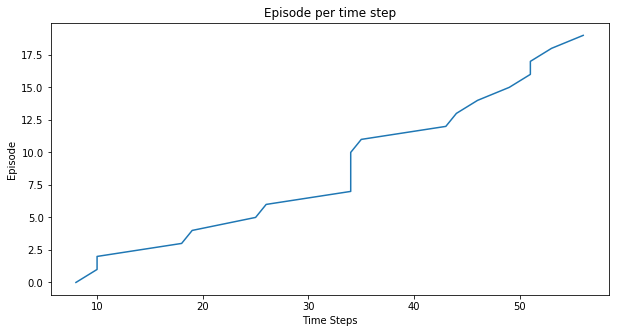

(<matplotlib.figure.Figure at 0x2155b8878d0>,
 <matplotlib.figure.Figure at 0x2155c7d9ac8>)

In [86]:
plotting.plot_episode_stats(stats, smoothing_window=5)

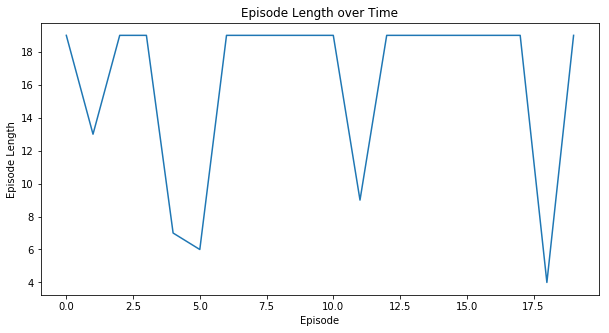

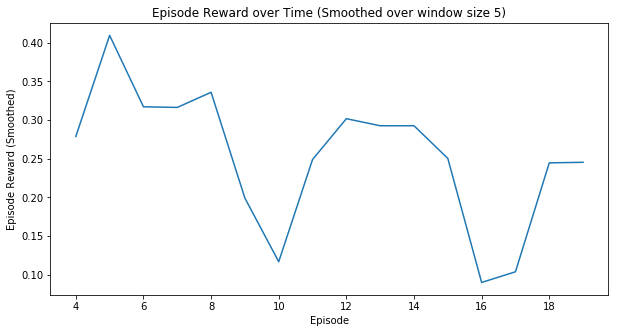

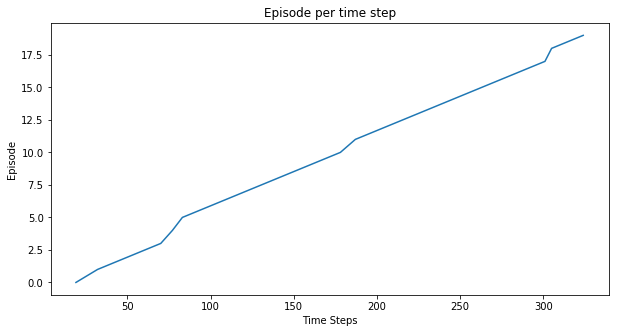

(<matplotlib.figure.Figure at 0x1cfac9ecc50>,
 <matplotlib.figure.Figure at 0x1cfaf5c56a0>)

In [37]:
plotting.plot_episode_stats(stats, smoothing_window=5)

In [47]:
type(stats)

plotting.Stats

In [50]:
print (plotting.__file__)

D:\git\learn-to-perform\notebooks\plotting.py


In [52]:
import pickle

In [53]:
from plotting import EpisodeStats

In [57]:
with open('session.dat', 'rb') as f:
    stats = pickle.load(f, encoding='latin-1')

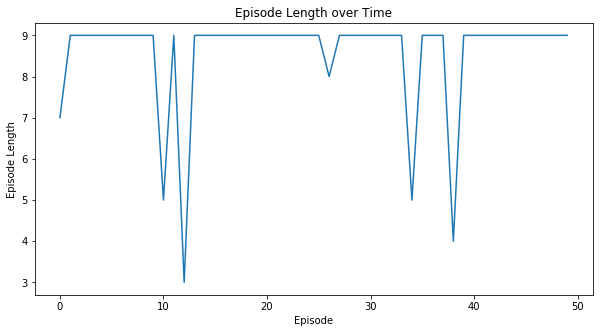

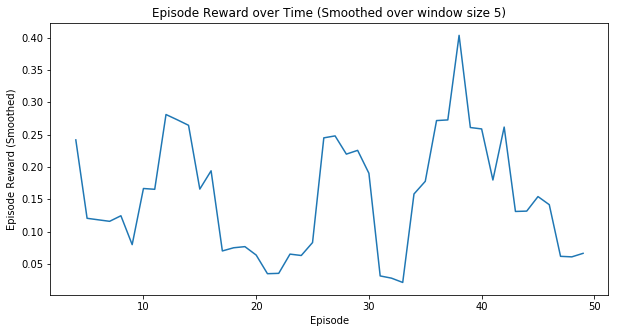

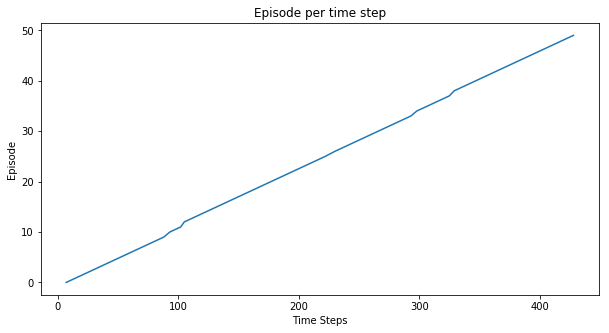

(<matplotlib.figure.Figure at 0x1cfb650a828>,
 <matplotlib.figure.Figure at 0x1cfb770cd68>)

In [58]:
plotting.plot_episode_stats(stats, smoothing_window=5)

In [84]:
with open('session.500.dat', 'rb') as f:
    stats = pickle.load(f, encoding='latin-1')

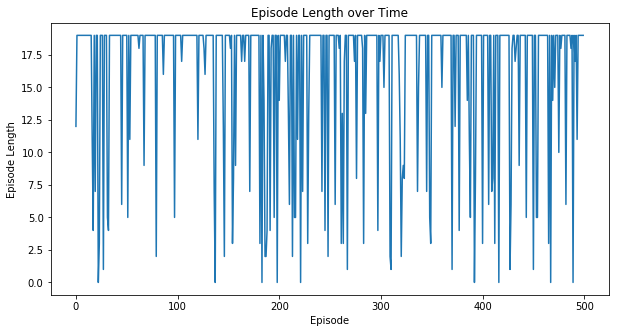

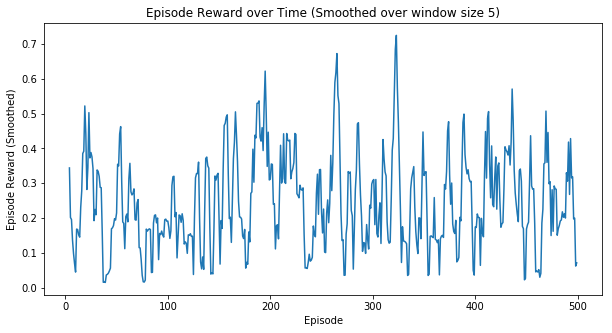

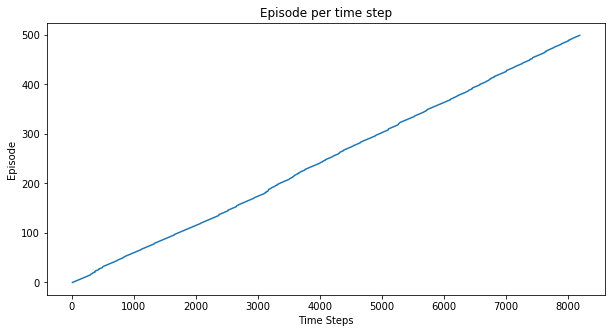

(<matplotlib.figure.Figure at 0x1cfc7e5d710>,
 <matplotlib.figure.Figure at 0x1cfc8087e80>)

In [85]:
plotting.plot_episode_stats(stats, smoothing_window=5)

In [65]:
import numpy as np


NameError: name 'mu' is not defined

In [69]:
mu = [2,3]
sigma = [1,1]
np.random.normal(mu, sigma, 3)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [70]:
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [103]:
a = [1,2,3]
b = a[:]
del a[2]

In [104]:
b

[1, 2, 3]

In [105]:
a

[1, 2]

In [102]:
clone(a)

NameError: name 'clone' is not defined

In [161]:
a, b = [1,2]

In [162]:
a

1